In [1]:
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2 

In [2]:
# load custom collection of functions
import sys
sys.path.append('/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/')
import utility_functions as UTIL

In [3]:
parent_directory = "/home/schmiedc/FMP_Docs/Projects/Bioactives_data/"

input_path = parent_directory + "results/"
output_path = input_path

figure_path = parent_directory + "figures/"

In [4]:
# data_HepG2_Norm = pd.read_csv(input_path + "2023-04-11_Bioactives_HepG2_norm.csv")
file_HepG2_type = '/*[0-9]_' + 'USC_HepG2_norm.csv'
files_HepG2 = glob.glob(input_path + file_HepG2_type)

### gets latest file
max_file_HepG2 = max(files_HepG2, key=os.path.getctime)

### load file
data_HepG2_Norm = pd.read_csv(max_file_HepG2)
data_HepG2_Norm.shape

(10747, 2984)

# Feature Selection

Modified from Carsten Beese

Variance frequency cut off 0.1

Variance unique cut off 0.1

Outlier cut off 100


Modified:
Corr Treshold 0.9

In [5]:
# HepG2 feature reduction
print("Feature reduction with correlation threshold 0.9 and Outlier threshold 100")
HepG2_Reduced_Carsten_100_Mod = UTIL.feature_reduction(data_HepG2_Norm, 
                                         variance_freq_cut=0.1, 
                                         variance_unique_cut=0.1, 
                                         outlier_cutoff=100, 
                                         corr_threshold = 0.9, 
                                         print_stats = True)

Feature reduction with correlation threshold 0.9 and Outlier threshold 100
| Category           |   Original Features |   Variance Threshold |   % Variance |   Outlier Threshold |   % Outlier |   Correlation Threshold |   % Correlation |
|:-------------------|--------------------:|---------------------:|-------------:|--------------------:|------------:|------------------------:|----------------:|
| Total Features     |                2977 |                 2818 |         94.7 |                2427 |        81.5 |                     627 |            21.1 |
| Intensity          |                 180 |                  180 |        100   |                 156 |        86.7 |                      38 |            21.1 |
| Correlation        |                 180 |                  123 |         68.3 |                 118 |        65.6 |                      84 |            46.7 |
| AreaShape          |                 162 |                  153 |         94.4 |                 152 |      

# Consensus Feature reduction

In [6]:
## gets feature vector
Features_HepG2_Reduced_Carsten_100_Mod = UTIL.get_feature_vector(HepG2_Reduced_Carsten_100_Mod)
Features_HepG2_Reduced_Carsten_100_Mod.append("Metadata_Object_Count") 


HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Carsten_100_Mod, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Reduced_Carsten_100_Mod, # (str, list) – The features to collapse, defaults to “infer”
)

In [7]:
# Moves position of Metadata_Object_Count column
HepG2_column_to_move = HepG2_Norm_Reduced_Median.pop("Metadata_Object_Count")
HepG2_Norm_Reduced_Median.insert(4, "Metadata_Object_Count", HepG2_column_to_move)
HepG2_Norm_Reduced_Median.head()

,Metadata_EOS,Metadata_Plate,Metadata_Concentration,Metadata_Partner,Metadata_Object_Count,Nuc_AreaShape_Area,Nuc_AreaShape_BoundingBoxArea,Nuc_AreaShape_BoundingBoxMinimum_Y,Nuc_AreaShape_Compactness,Nuc_AreaShape_Eccentricity,...,Cyto_Texture_InfoMeas1_ER_3_02_256,Cyto_Texture_InfoMeas1_ER_5_00_256,Cyto_Texture_InfoMeas1_ER_5_03_256,Cyto_Texture_InfoMeas1_Mito_3_00_256,Cyto_Texture_InfoMeas2_AGP_5_02_256,Cyto_Texture_InfoMeas2_DNA_3_01_256,Cyto_Texture_InfoMeas2_ER_5_01_256,Cyto_Texture_InverseDifferenceMoment_ER_10_03_256,Cyto_Texture_SumAverage_ER_10_02_256,Cyto_Texture_SumVariance_ER_5_01_256
0,DMSO,B1001,0,Bioactives,1368.0,0.0,0.0,0.0,0.0,0.0,...,-1.051242e-15,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,2.150190e-15,-1.351350e-15,0.000000e+00
1,DMSO,B1002,0,Bioactives,1150.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,1.600282e-15,0.000000e+00,0.0,-1.899522e-15,0.0,0.000000e+00,0.000000e+00,-4.492934e-16
2,DMSO,B1003,0,Bioactives,1259.5,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,-4.996004e-16,0.0,0.000000e+00,0.0,-2.600025e-15,0.000000e+00,0.000000e+00
3,DMSO,B1004,0,Bioactives,1249.5,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,-3.750472e-15,0.0,-1.350482e-15,0.000000e+00,0.000000e+00
4,DMSO,B1005,0,Bioactives,1249.5,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.0,0.000000e+00,-2.249936e-15,0.0,0.000000e+00,0.0,2.450080e-15,0.000000e+00,0.000000e+00


In [8]:
# filename_HepG2_Norm_Reduced_Median = output_path + str(date.today()) + "_Bioactives_HepG2_norm_reduced_Median_Cell-Number.csv"
# HepG2_Norm_Reduced_Median.to_csv(filename_HepG2_Norm_Reduced_Median, index = False)

# Create Feature annotation for Profile Viz

In [9]:
HepG2_Norm_Reduced_Median_copy = HepG2_Norm_Reduced_Median.copy()
HepG2_Norm_Reduced_Median_copy.columns = HepG2_Norm_Reduced_Median_copy.columns.str.split('_', expand=True, n=2)
HepG2_Norm_Reduced_Median_copy.head()

Metadata                                                Nuc                  \
       EOS  Plate Concentration     Partner  Object AreaShape                   
       NaN    NaN           NaN         NaN   Count      Area BoundingBoxArea   
0     DMSO  B1001             0  Bioactives  1368.0       0.0             0.0   
1     DMSO  B1002             0  Bioactives  1150.0       0.0             0.0   
2     DMSO  B1003             0  Bioactives  1259.5       0.0             0.0   
3     DMSO  B1004             0  Bioactives  1249.5       0.0             0.0   
4     DMSO  B1005             0  Bioactives  1249.5       0.0             0.0   

                                                 ...                  Cyto  \
                                                 ...               Texture   
  BoundingBoxMinimum_Y Compactness Eccentricity  ... InfoMeas1_ER_3_02_256   
0                  0.0         0.0          0.0  ...         -1.051242e-15   
1                  0.0         0.0          0.0  ...          0.000000e+00   
2                  0.0         0.0          0.0  ...          0.000000e+00   
3                  0.0         0.0          0.0  ...          0.000000e+00   
4                  0.0         0.0          0.0  ...          0.000000e+00   

                                                                       \
                                                                        
  InfoMeas1_ER_5_00_256 InfoMeas1_ER_5_03_256 InfoMeas1_Mito_3_00_256   
0                   0.0          0.000000e+00            0.000000e+00   
1                   0.0          1.600282e-15            0.000000e+00   
2                   0.0          0.000000e+00           -4.996004e-16   
3                   0.0          0.000000e+00            0.000000e+00   
4                   0.0          0.000000e+00           -2.249936e-15   

                                                                       \
                                                                        
  InfoMeas2_AGP_5_02_256 InfoMeas2_DNA_3_01_256 InfoMeas2_ER_5_01_256   
0                    0.0           0.000000e+00                   0.0   
1                    0.0          -1.899522e-15                   0.0   
2                    0.0           0.000000e+00                   0.0   
3                    0.0          -3.750472e-15                   0.0   
4                    0.0           0.000000e+00                   0.0   

                                                                \
                                                                 
  InverseDifferenceMoment_ER_10_03_256 SumAverage_ER_10_02_256   
0                         2.150190e-15           -1.351350e-15   
1                         0.000000e+00            0.000000e+00   
2                        -2.600025e-15            0.000000e+00   
3                        -1.350482e-15            0.000000e+00   
4                         2.450080e-15            0.000000e+00   

                           
                           
  SumVariance_ER_5_01_256  
0            0.000000e+00  
1           -4.492934e-16  
2            0.000000e+00  
3            0.000000e+00  
4            0.000000e+00  

[5 rows x 632 columns]

In [10]:
filename_HepG2_Norm_Reduced_Median_ProfileViz = output_path + "ProfileViz/" +  str(date.today()) + "_USC_HepG2_norm_reduced_Median_ProfileViz.csv"
HepG2_Norm_Reduced_Median_copy.to_csv(filename_HepG2_Norm_Reduced_Median_ProfileViz, index = False)

# Remove toxic compounds

Toxic conditions removed with threshold 480.19
Old shape (10747, 634)
New shape (10382, 634)


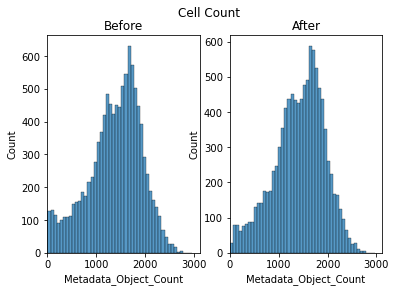

In [11]:
HepG2_Reduced_Tox, HepG2_Reduced_Tox_Cond = UTIL.remove_tox(
    HepG2_Reduced_Carsten_100_Mod, 
    key_col = ["Metadata_EOS", "Metadata_Plate"], 
    SD_Threshold = 2.5,  
    plot_distribution = True)

In [12]:
len(HepG2_Reduced_Tox["Metadata_EOS"].unique())

2375

# Raw % replication

In [13]:
HepG2_replicating, HepG2_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  62.5 |
Nonreplicating conditions removed with threshold 0.45
Old shape (10382, 634)
New shape (6824, 634)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


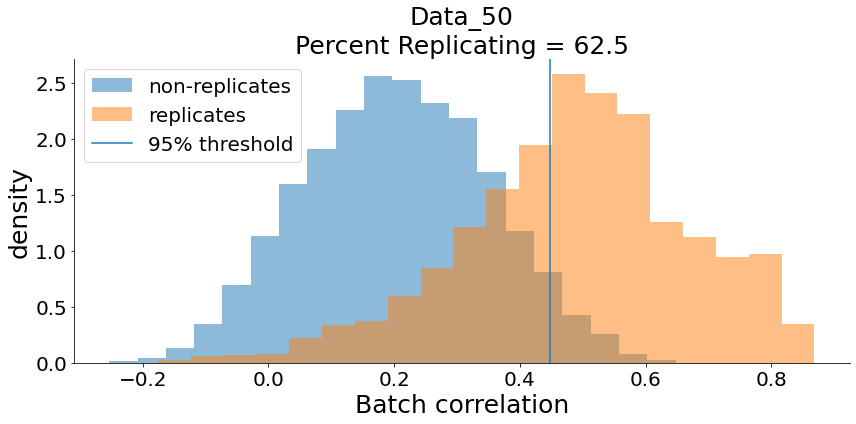

In [14]:
n_experiments = len(HepG2_corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(HepG2_corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{HepG2_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {HepG2_corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_USC_HepG2_Percent_Replicating.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

# Compute Median for Induction

Tox filtered

Remove only toxic compounds

Non Replicating compounds are not removed


In [15]:
## gets feature vector
Features_HepG2_Norm_Reduced = UTIL.get_feature_vector(HepG2_Reduced_Tox)

HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Tox, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate","Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [16]:
len(HepG2_Norm_Reduced_Median["Metadata_EOS"].unique())

2375

# Remove compounds with low acitivity

In [17]:
key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Partner"]

HepG2_active, HepG2_low_active = UTIL.remove_low_active(HepG2_Norm_Reduced_Median, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("HepG2 active:", len(HepG2_active["Metadata_EOS"].unique()))
print("HepG2 low-active:", len(HepG2_low_active["Metadata_EOS"].unique()))

HepG2 active: 607
HepG2 low-active: 1768


In [18]:
HepG2_low_active_EOS = pd.DataFrame(HepG2_low_active["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_low_active = output_path +  str(date.today()) + "_USC_HepG2_low-active.csv"
HepG2_low_active_EOS.to_csv(filename_HepG2_low_active, index = False)

## Filter non active compounds from non consensus dataframe

In [19]:
HepG2_Reduced_Tox_active = HepG2_Reduced_Tox[
    (HepG2_Reduced_Tox['Metadata_EOS'].isin(HepG2_active['Metadata_EOS']))]

# % Replicating after Induction filter

In [20]:
HepG2_active_replicating, HepG2_active_corr_replicating_df = UTIL.remove_non_reproducible(
    HepG2_Reduced_Tox_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  94.4 |
Nonreplicating conditions removed with threshold 0.42
Old shape (2531, 634)
New shape (2396, 634)


/home/schmiedc/FMP_Docs/Projects/Bioactives_data/notebooks/utility_functions.py:390: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


In [21]:
filename_HepG2_Norm_Reduced_Filtered = output_path + str(date.today()) + "_USC_HepG2_norm_reduced_filtered.csv"
HepG2_active_replicating.to_csv(filename_HepG2_Norm_Reduced_Filtered, index = False)

In [22]:
# save non replicating compounds
HepG2_non_replicating = HepG2_Reduced_Tox_active[
    (~HepG2_Reduced_Tox_active['Metadata_EOS'].isin(HepG2_active_replicating['Metadata_EOS']))]

HepG2_non_replicating_EOS = pd.DataFrame(HepG2_non_replicating["Metadata_EOS"].unique(), columns = ["Metadata_EOS"])

filename_HepG2_non_replicating = output_path +  str(date.today()) + "_USC_HepG2_non-replicating.csv"
HepG2_non_replicating_EOS.to_csv(filename_HepG2_non_replicating, index = False)

In [23]:
len(HepG2_non_replicating['Metadata_EOS'].unique())

34

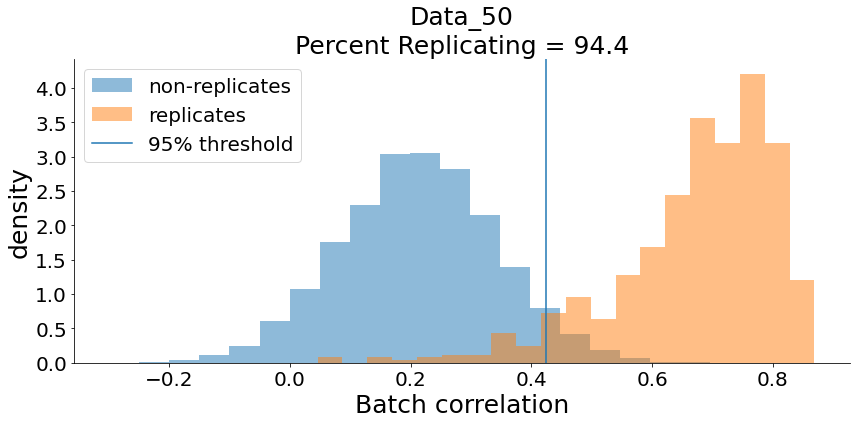

In [24]:
# plot % replicating
corr_replicating_df = HepG2_active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(figure_path + str(date.today()) + "_USC_HepG2_Percent_Replicating_Induction_Filter.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)# 

# Consensus Tox, Induction, Replication Filter

In [25]:
## gets feature vector
Features_HepG2_Norm_Reduced_Filtered = UTIL.get_feature_vector(HepG2_active_replicating)

HepG2_Norm_Reduced_Filtered_Median = pycytominer.consensus(
        profiles = HepG2_active_replicating, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration", "Metadata_Partner"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [26]:
len(HepG2_Norm_Reduced_Filtered_Median["Metadata_EOS"].unique())

573

In [27]:
filename_HepG2_Norm_Reduced_Filtered_Median = output_path + str(date.today()) + "_USC_HepG2_norm_reduced_filtered_median.csv"
HepG2_Norm_Reduced_Filtered_Median.to_csv(filename_HepG2_Norm_Reduced_Filtered_Median, index = False)

# Get non replicating compounds

In [28]:
HepG2_non_replicating_merge = pd.merge(HepG2_active,
                                HepG2_Norm_Reduced_Filtered_Median,
                                on = ["Metadata_EOS"],
                                how = "outer",
                                indicator = True)

HepG2_non_replicating = HepG2_non_replicating_merge[
    HepG2_non_replicating_merge["_merge"] == 'left_only'].dropna(axis='columns')

In [29]:
HepG2_non_replicating_merge['_merge'].value_counts()

both          963
left_only      34
right_only      0
Name: _merge, dtype: int64